# Set Environment

In [1]:
#  loading packages and libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import os

%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

# Load File 

Below is the description for each columns in the data. The aim is practice different machine learning models and find the right model or intergrated models to classify mushrooms


Attribute Information: (classes: edible=e, poisonous=p)

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [2]:
# change working directory
root_path = "/Users/linzhu/Documents/mooc/mlnd/machine-learning\
/projects/mushroom_classification"
os.chdir(root_path)
print os.getcwd()

/Users/linzhu/Documents/mooc/mlnd/machine-learning/projects/mushroom_classification


# Data Preprocessing

## Loading Data 

In [3]:
data = pd.read_csv("mushrooms.csv")
data.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


## Data Exploration

In [4]:
data.shape

(8124, 23)

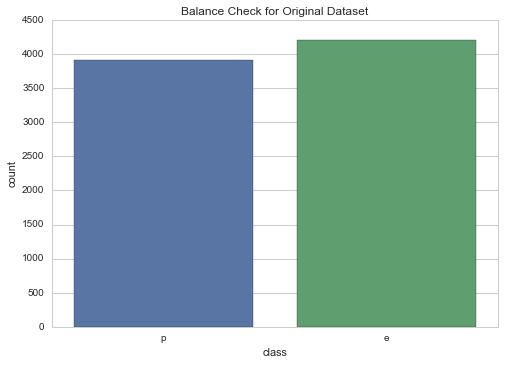

In [5]:
# check balance or not
sns.countplot(x = data["class"], data = data)
sns.plt.title("Balance Check for Original Dataset",fontsize=12)

In [6]:
# "e" over "p" ratio
e_p_ratio = data[data["class"] == "e"]["class"].count() \
/ float(data[data["class"] == "p"]["class"].count())
print e_p_ratio.round(2)
print data[data["class"] == "e"]["class"].count()

1.07
4208


check missing value, result shows there is no missing value, which is perfect for applying classification. 

In [7]:
# check missing values
data.isnull().sum()
# no unfilled value

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### check unique values 

In [8]:
# unique value for each feature
for col in data.columns.values:
    print "{0}: {1}".format(col, data[col].unique())

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


- It shows that *'veil-type'* has only one unique value *'p'*, which is not influence the classification result, should be dropped
- Also, the *'stalk-root'* has *'?'* values, which is confusing to the result without data-processing

In [9]:
# check "?" value, 2480 values are missing from "stalk-root"
data[data["stalk-root"] == "?"].count()

class                       2480
cap-shape                   2480
cap-surface                 2480
cap-color                   2480
bruises                     2480
odor                        2480
gill-attachment             2480
gill-spacing                2480
gill-size                   2480
gill-color                  2480
stalk-shape                 2480
stalk-root                  2480
stalk-surface-above-ring    2480
stalk-surface-below-ring    2480
stalk-color-above-ring      2480
stalk-color-below-ring      2480
veil-type                   2480
veil-color                  2480
ring-number                 2480
ring-type                   2480
spore-print-color           2480
population                  2480
habitat                     2480
dtype: int64

If move the "?" values, around 30% data might be deleted. I decide to keep it for futher analysis

### Feature Distribution Analysi 

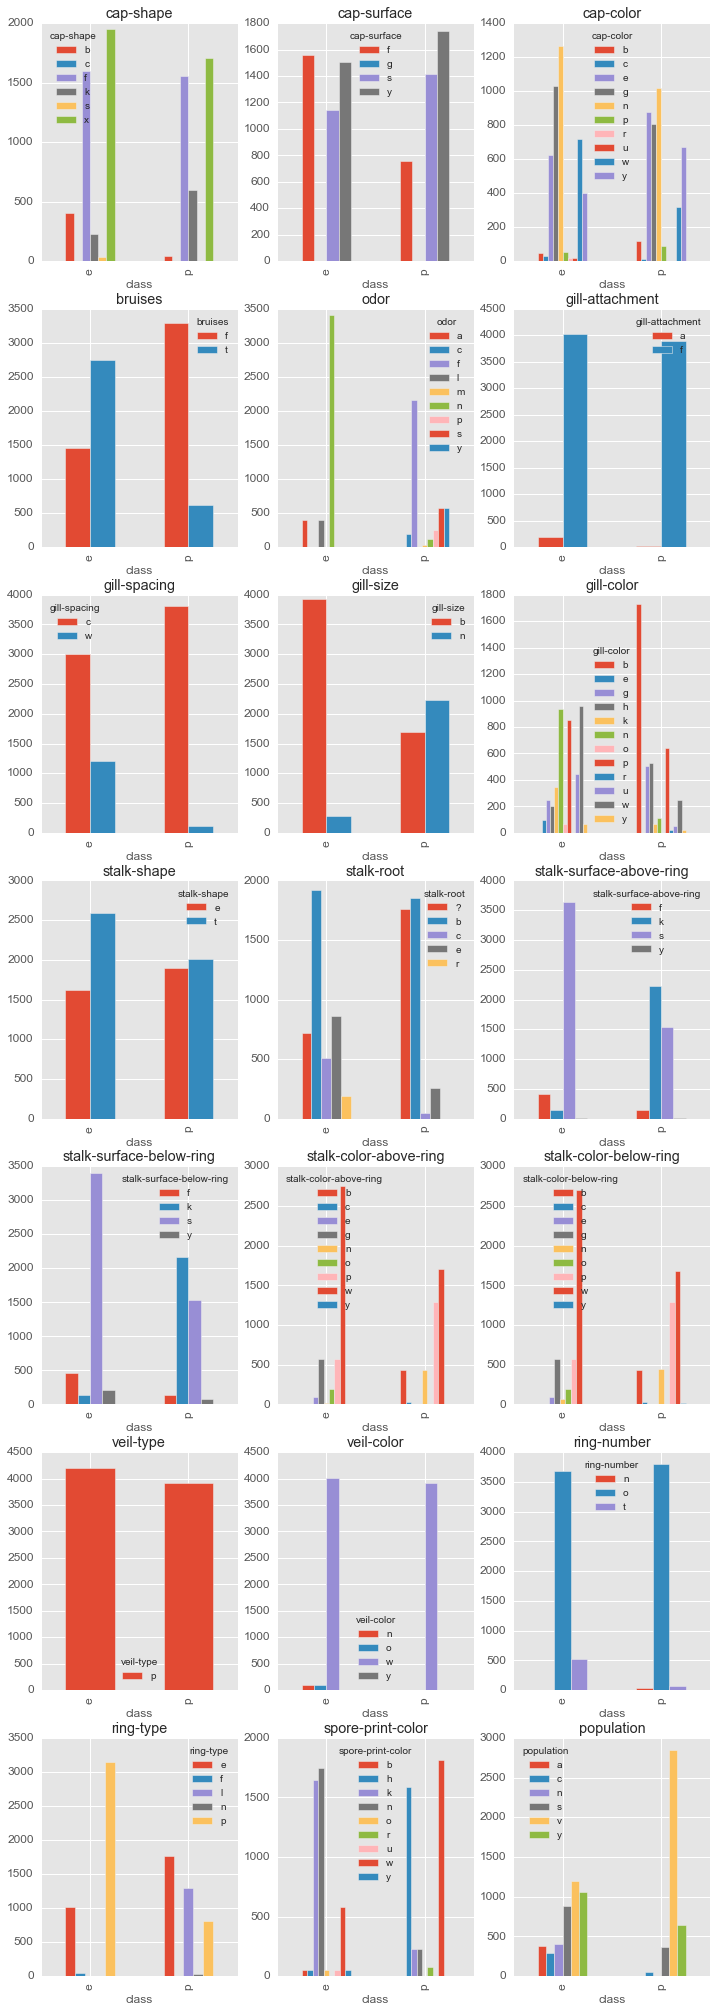

In [10]:
feature_columns = data.columns[1:]
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows= 7, ncols=3,figsize=(12, 35))
data['id'] = np.arange(1, data.shape[0] + 1)

for f, ax in zip(feature_columns, axes.ravel()):
    data.groupby(['class', f])['id'].count().unstack(f).\
    plot(kind='bar', ax=ax, legend=True, grid=True, title=f,fontsize = 12)
data = data.drop("id",axis = 1)   

### Data Cleaning

In [11]:
# drop "veil-type", features were reduced to 21 columns
data = data.drop("veil-type", axis = 1)
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


### Encode Categorical Data 

In [12]:
data.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g


In [13]:
# Alternate dataset for future usage
data_le = data # data come from Label Encoder
data_oh = data  # data from one hot encoder

print data_oh.info()
print data_oh.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

#### One Hot Encoder Transformation 

In [14]:
# encode and transform cleaned data with one-hot-encoder
from sklearn.feature_extraction import DictVectorizer

def encode_onehot(df):
    vec = DictVectorizer()
    
    vec_data = pd.DataFrame(vec.fit_transform(df.to_dict(orient='records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    return vec_data

data_oh = encode_onehot(data_oh)
data_oh.head(2)

,bruises=f,bruises=t,cap-color=b,cap-color=c,cap-color=e,cap-color=g,cap-color=n,cap-color=p,cap-color=r,cap-color=u,...,stalk-surface-above-ring=s,stalk-surface-above-ring=y,stalk-surface-below-ring=f,stalk-surface-below-ring=k,stalk-surface-below-ring=s,stalk-surface-below-ring=y,veil-color=n,veil-color=o,veil-color=w,veil-color=y
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Feature Correlation Study 

#### Label Encoder Transformation 

In [15]:
# LabelEncoder transfer categorical data into numerical  
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data_le.columns:
    data_le[col] = le.fit_transform(data_le[col])

data_le.head()
print data.head()

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color   ...     stalk-surface-above-ring  \
0             0          1           4   ...                            2   
1             0          0           4   ...                            2   
2             0          0           5   ...                            2   
3             0          1           5   ...                            2   
4             1          0           4   ...                            2   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-col

In [16]:
# split features and labels
X_le = data_le.iloc[:, 1:]
y_le = data_le.iloc[:, 0]
print "Sample in X is", X_le.head(2);
# print "Sample in y is", y.head(2);

Sample in X is    cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   

   gill-spacing  gill-size  gill-color  stalk-shape   ...     \
0             0          1           4            0   ...      
1             0          0           4            0   ...      

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                         2                         2                       7   
1                         2                         2                       7   

   stalk-color-below-ring  veil-color  ring-number  ring-type  \
0                       7           2            1          4   
1                       7           2            1          4   

   spore-print-color  population  habitat  
0                  2           3        5  
1                  3           2        1  

[2

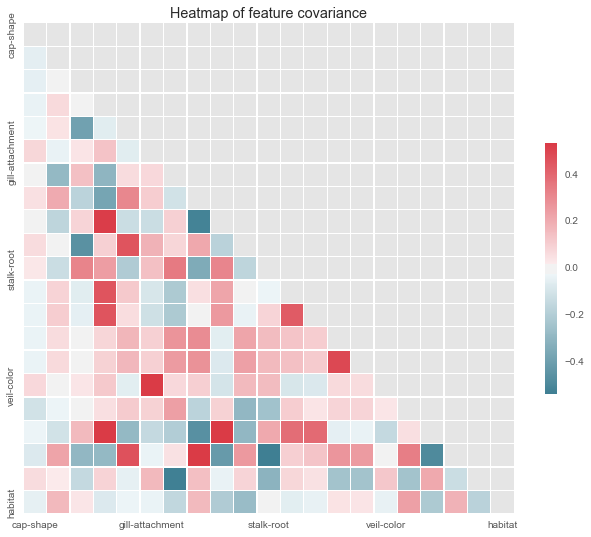

In [17]:
# compute correlation matrix
corr = X_le.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
plt.title("Heatmap of feature covariance")
plt.xlabel("Features")
plt.ylabel("Features")

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.25, cbar_kws={"shrink": .5}, ax=ax)

#### StandardScaler for LabelEncoder

In [18]:
# standardize data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

for col in X_le.columns:
    X_le[col] = sc_X.fit_transform(X_le[col])
X_le.head()

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.r

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


### Feature Importance Study with Xgboost 

In [19]:
# train-testing data split
from sklearn.cross_validation import train_test_split
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size = 0.2,\
                                                   random_state = 0)

print "Training set has {} samples.".format(X_train_le.shape[0])
print "Testing set has {} samples.".format(X_test_le.shape[0])

Training set has 6499 samples.
Testing set has 1625 samples.


In [20]:
# define helper functions for training and prediction
from time import time
def train_classifier(clf, X_train, y_train):
    '''Fits a classifier to the training data.'''
    # check time
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    t = end - start
    print "Trained model in {:.4f} seconds".format(t)
    
def predict_labels(clf, features, target):
    '''Make predictions using a fit classifier based on F1 score'''
    # check time
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred), accuracy_score(target.values, y_pred)

def train_predict(clf, X_train, X_test, y_train, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} ".format(clf.__class__.__name__)
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
#     print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)[0])
#     print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)[0])    
    
    print "Accuracy score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)[1])
    print "Accuracy score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)[1])  

In [21]:
# train different models and compare
from sklearn.linear_model import LogisticRegression as lr
from xgboost import XGBClassifier as xgb
from sklearn.svm import SVC as svc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

models = [xgb(),svc(kernel = 'linear', random_state = 0), ]

for i, model in enumerate(models):
    print "###############"
    train_predict(model, X_train_le, X_test_le, y_train_le, y_test_le)
    print "###############"


###############
Training a XGBClassifier 
Trained model in 0.3900 seconds
Made predictions in 0.0178 seconds.
Accuracy score for training set: 1.0000.
Made predictions in 0.0045 seconds.
Accuracy score for test set: 1.0000.
###############
###############
Training a SVC 
Trained model in 0.9231 seconds
Made predictions in 0.0974 seconds.
Accuracy score for training set: 0.9874.
Made predictions in 0.0275 seconds.
Accuracy score for test set: 0.9902.
###############


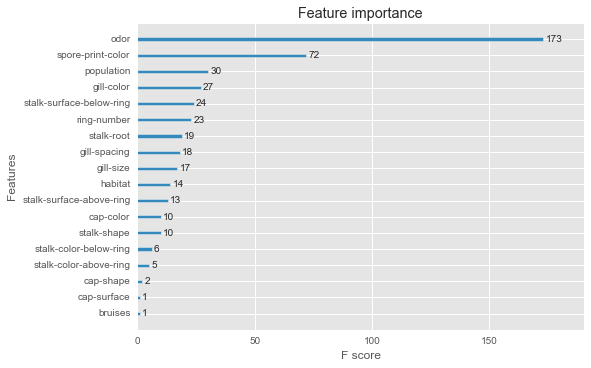

In [22]:
import xgboost
ax= xgboost.plot_importance(models[0])

# MLP Neural Network Model with Tensorflow

In [23]:
# Train, testing set split
from sklearn.cross_validation import train_test_split # helper method to split dataset
train, test = train_test_split(data_oh, test_size=0.2)
train_y = train[["class=e", "class=p"]] 
train_x = train.drop(["class=e","class=p"], 1)
test_y = test[["class=e", "class=p"]]
test_x = test.drop(["class=e", "class=p"], 1)

### Model Architect

In [24]:
import tensorflow as tf
from time import time

def tf_nn(n1, n2, iteration, train_x, test_x, train_y, test_y):
    
    sess = tf.InteractiveSession()

    x = tf.placeholder(tf.float32, shape=[None, n1]) # will hold features through feed_dict. Shape is [None, 116]
                                                      # because we have an undefined number of rows and 116 features
    y_ = tf.placeholder(tf.float32, shape=[None, n2]) # will hold labels through feed_dict. Shape is [None, 2]
                                                     # beacause we have an undefined number of rows and 2 output classes
                                                     # or labels

    W = tf.Variable(tf.zeros([n1, n2])) # initialize weights and
    b = tf.Variable(tf.zeros([n2])) # biases

    sess.run(tf.global_variables_initializer())

    y = tf.sigmoid(tf.matmul(x, W) + b) # we compute our prediction and use a sigmoid activation function to get
                                        # results as probabilities

    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_)) # cross entropy as our loss function
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy) # minimize loss with Gradient Descent

    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # used to calculate accuracy later

    start = time()
    for i in range(iteration):
        train_step.run(feed_dict={x: train_x, y_: train_y})
#         print("Training iteration " + str(i) + ": " + str(accuracy.eval(feed_dict={x: train_x, y_: train_y})))

    acc_test = accuracy.eval(feed_dict={x: test_x, y_: test_y}).round(4)
    print("Accuracy in test set: ", accuracy.eval(feed_dict={x: test_x, y_: test_y}))
    end = time()
    t = end - start

    print "Total running time: ", t
    return acc_test, t
# examples
tf_nn(116, 2, 300, train_x, test_x, train_y, test_y)

('Accuracy in test set: ', 0.97784615)
Total running time:  2.40655088425


(0.97780001, 2.406550884246826)

### Plot accuracy and running time against number of train steps 

In [25]:
acc_base_2 = []
t_base_2 = []
    
for j in range(100, 1000, 50):
    acc, t =  tf_nn(116, 2, j, train_x, test_x, train_y, test_y)
    acc_base_2.append(acc)
    t_base_2.append(t)

('Accuracy in test set: ', 0.94953847)
Total running time:  0.982388019562
('Accuracy in test set: ', 0.96984613)
Total running time:  1.46429491043
('Accuracy in test set: ', 0.97538459)
Total running time:  1.86554503441
('Accuracy in test set: ', 0.97784615)
Total running time:  2.36608290672
('Accuracy in test set: ', 0.97784615)
Total running time:  2.54101395607
('Accuracy in test set: ', 0.97907692)
Total running time:  2.88015389442
('Accuracy in test set: ', 0.9803077)
Total running time:  3.34441494942
('Accuracy in test set: ', 0.98215383)
Total running time:  3.98441195488
('Accuracy in test set: ', 0.98276925)
Total running time:  4.33671283722
('Accuracy in test set: ', 0.98400003)
Total running time:  4.95714092255
('Accuracy in test set: ', 0.98461539)
Total running time:  4.76078891754
('Accuracy in test set: ', 0.98461539)
Total running time:  5.11948299408
('Accuracy in test set: ', 0.98461539)
Total running time:  5.48800396919
('Accuracy in test set: ', 0.98461539)

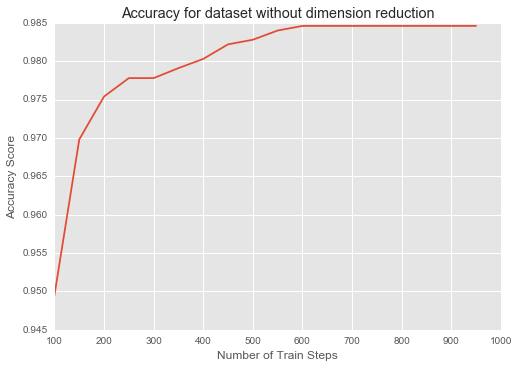

In [26]:
x = range(100, 1000, 50)
plt.plot(x,acc_base_2)
plt.title("Accuracy for dataset without dimension reduction")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of Train Steps")
label = ["Accuracy"] 

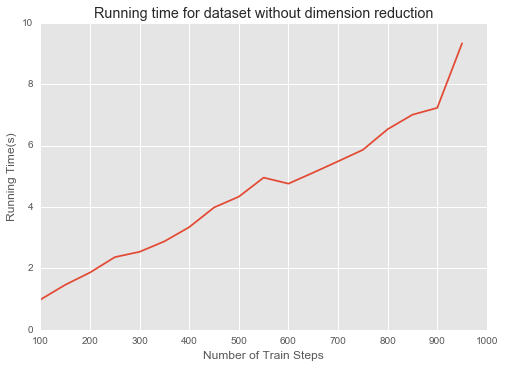

In [27]:
x = range(100, 1000, 50)
plt.plot(x,t_base_2)
plt.ylabel("Running Time(s)")
plt.xlabel("Number of Train Steps")
plt.title("Running time for dataset without dimension reduction")
label = ["Running Time"] 

### Dimension Reduction 

In [28]:
# split features and labels for PCA
y_oh = data_oh[["class=e", "class=p"]]
X_oh = data_oh.drop(["class=e", "class=p"], 1)
print "Sample in X is", X_oh.head(2);

Sample in X is    bruises=f  bruises=t  cap-color=b  cap-color=c  cap-color=e  cap-color=g  \
0        0.0        1.0          0.0          0.0          0.0          0.0   
1        0.0        1.0          0.0          0.0          0.0          0.0   

   cap-color=n  cap-color=p  cap-color=r  cap-color=u      ...       \
0          1.0          0.0          0.0          0.0      ...        
1          0.0          0.0          0.0          0.0      ...        

   stalk-surface-above-ring=s  stalk-surface-above-ring=y  \
0                         1.0                         0.0   
1                         1.0                         0.0   

   stalk-surface-below-ring=f  stalk-surface-below-ring=k  \
0                         0.0                         0.0   
1                         0.0                         0.0   

   stalk-surface-below-ring=s  stalk-surface-below-ring=y  veil-color=n  \
0                         1.0                         0.0           0.0   
1              

In [29]:
# Apply PCA to the feature set and re-define the MLP neural network model
from sklearn.decomposition import PCA
def dimension_reduction(n_components):
    pca = PCA(n_components = n_components)
    pca.fit(X_oh)
    X_oh_reduced = pca.transform(X_oh)
    X_train_oh_reduced, X_test_oh_reduced, y_train_oh_reduced, \
    y_test_oh_reduced = train_test_split(X_oh_reduced, y_oh, \
                                         test_size = 0.2,random_state = 0)
    return X_train_oh_reduced, X_test_oh_reduced, y_train_oh_reduced,\
y_test_oh_reduced

def pca_tf_nn(n_components,n2,iteration):
    train_x, test_x, train_y, test_y = dimension_reduction(n_components)
    n1 = n_components
    acc, t = tf_nn(n1, n2, iteration, train_x, test_x, train_y, test_y)
    return acc, t

In [30]:
# examples 
tf_nn(116,2,300, train_x, test_x, train_y, test_y)
pca_tf_nn(50, 2, 300)

('Accuracy in test set: ', 0.97784615)
Total running time:  4.77437710762
('Accuracy in test set: ', 0.98338461)
Total running time:  2.20196914673


(0.98339999, 2.2019691467285156)

### Plot the Accuracy and running time after PCA  

In [31]:
acc_reduced = {}
t_reduced = {}

start = time()
for i in range(30, 55, 5):
    acc_base = []
    t_base = []
    acc_pca = []
    t_pca = []
    key = str(i)+"-components"
    
    for j in range(100, 900, 100):
        acc, t =  tf_nn(116, 2, j, train_x, test_x, train_y, test_y)
        acc_base.append(acc)
        t_base.append(t)
        
        acc_r, t_r = pca_tf_nn(i,2,j)
        acc_pca.append(acc_r)
        t_pca.append(t_r)
        
    acc_reduced[key] = acc_pca
    t_reduced[key] = t_pca
end = time()
print "Total time:", (end - start)

('Accuracy in test set: ', 0.94953847)
Total running time:  1.33245205879
('Accuracy in test set: ', 0.9513846)
Total running time:  0.651462078094
('Accuracy in test set: ', 0.97538459)
Total running time:  2.30639481544
('Accuracy in test set: ', 0.97600001)
Total running time:  1.42112493515
('Accuracy in test set: ', 0.97784615)
Total running time:  2.8217818737
('Accuracy in test set: ', 0.97538459)
Total running time:  1.24412608147
('Accuracy in test set: ', 0.9803077)
Total running time:  4.21611905098
('Accuracy in test set: ', 0.97600001)
Total running time:  1.5287539959
('Accuracy in test set: ', 0.98276925)
Total running time:  4.58674311638
('Accuracy in test set: ', 0.97661537)
Total running time:  1.95183682442
('Accuracy in test set: ', 0.98461539)
Total running time:  5.25013589859
('Accuracy in test set: ', 0.97784615)
Total running time:  2.1342151165
('Accuracy in test set: ', 0.98461539)
Total running time:  6.02410888672
('Accuracy in test set: ', 0.97969228)
Tot

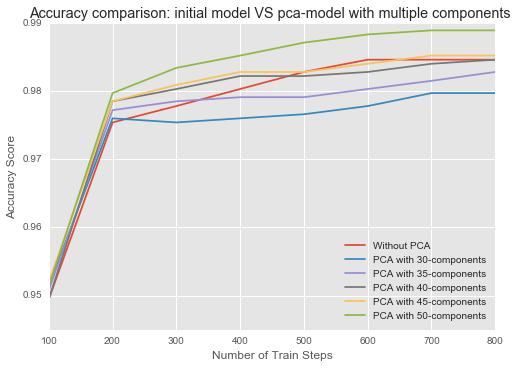

In [32]:
# print range(100, 300, 100)
x = range(100, 900, 100)
plt.title("Accuracy comparison: initial model VS pca-model with multiple components ")
plt.plot(x, acc_base)
plt.ylabel("Accuracy Score")
plt.xlabel("Number of Train Steps")
label = ["Without PCA"]
for i in range(30, 55, 5):
    key = str(i)+"-components"
    plt.plot(x, acc_reduced[key])
    label.append("PCA with "+key)
plt.legend(label, loc='lower right')

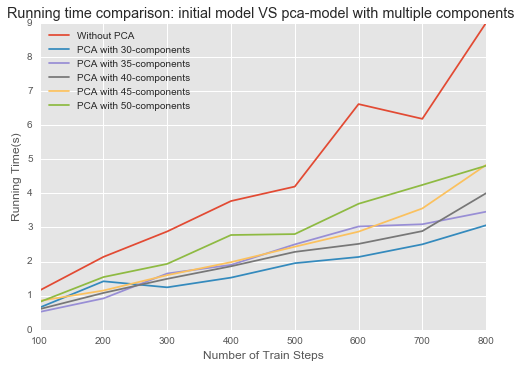

In [33]:
# print range(100, 300, 100)
x = range(100, 900, 100)
plt.title("Running time comparison: initial model VS pca-model with multiple components ")
plt.plot(x, t_base)
plt.ylabel("Running Time(s)")
plt.xlabel("Number of Train Steps")
label = ["Without PCA"]
for i in range(30, 55, 5):
    key = str(i)+"-components"
    plt.plot(x, t_reduced[key])
    label.append("PCA with "+key)
plt.legend(label, loc='upper left')

In [34]:
pca_tf_nn(50,2,300)

('Accuracy in test set: ', 0.98338461)
Total running time:  2.05325508118


(0.98339999, 2.053255081176758)

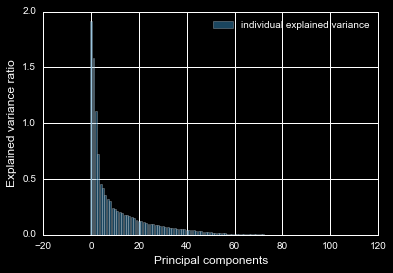

In [35]:
pca = PCA()
pca.fit(X_oh)
explained_variance= pca.explained_variance_.round(4)

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(116),explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
#     plt.tight_layout()


### Robustness Validation 

Sample the dataset and make new inputs with various size, check performance metrics with different inputs, to test the model's robustness with inputs size changes.

In [36]:
# Define new model function allow various inputs size
def dimension_reduction_test(n_components, sample_size):
    pca = PCA(n_components = n_components)
    data_oh_test = data_oh.sample(sample_size)
    y_oh_test = data_oh_test[["class=e","class=p"]]
    X_oh_test = data_oh_test.drop(["class=e","class=p"],1)
    pca.fit(X_oh_test)
    X_oh_reduced = pca.transform(X_oh_test)
    X_train_oh_reduced, X_test_oh_reduced, y_train_oh_reduced, \
    y_test_oh_reduced = train_test_split(X_oh_reduced, y_oh_test, \
                                         test_size = 0.2,random_state = 0)
    return X_train_oh_reduced, X_test_oh_reduced, y_train_oh_reduced,\
y_test_oh_reduced

def pca_tf_nn_test(n_components,n2,iteration, sample_size):
    train_x, test_x, train_y, test_y = dimension_reduction_test\
    (n_components, sample_size)
    n1 = n_components
    acc, t = tf_nn(n1, n2, iteration, train_x, test_x, train_y, test_y)
    return acc, t

In [37]:
# test run with multiple size inputs
acc_test = []
t_test = []

for sample_size in range(2000, 8500, 500):
    acc, t = pca_tf_nn_test(50, 2, 300, sample_size)
    acc_test.append(acc)
    t_test.append(t)
    

('Accuracy in test set: ', 0.98250002)
Total running time:  0.86478304863
('Accuracy in test set: ', 0.96799999)
Total running time:  1.04816889763
('Accuracy in test set: ', 0.98666668)
Total running time:  1.0784509182
('Accuracy in test set: ', 0.96857142)
Total running time:  1.14765286446
('Accuracy in test set: ', 0.97750002)
Total running time:  1.19978189468
('Accuracy in test set: ', 0.98444444)
Total running time:  1.27870512009
('Accuracy in test set: ', 0.98000002)
Total running time:  1.23139119148
('Accuracy in test set: ', 0.98727274)
Total running time:  1.29940390587
('Accuracy in test set: ', 0.98083335)
Total running time:  1.50137996674
('Accuracy in test set: ', 0.98230767)
Total running time:  1.50197386742
('Accuracy in test set: ', 0.98071426)
Total running time:  1.91288399696
('Accuracy in test set: ', 0.986)
Total running time:  1.99958205223
('Accuracy in test set: ', 0.98812503)
Total running time:  2.0488820076


In [38]:
# standard deviation study regarding inputs with multiple sizes
acc_array = np.array(acc_test)
print np.std(acc_array)

t_array = np.array(t_test)
print np.std(t_array)

0.00619695
0.365255948216


### Feature Importance Justification 

Construct a new PCA MLP Neural Network model with attributes realted only to significant features from the original 21 features. Train,test and then compare with the final model performance

In [39]:
X_oh_feature = X_oh[["odor=a", "odor=l", "odor=c","odor=y","odor=f","odor=m",\
                "odor=n","odor=p","odor=s","spore-print-color=k",\
                "spore-print-color=n","spore-print-color=b",\
                "spore-print-color=h","spore-print-color=r",\
                 "spore-print-color=o","spore-print-color=u",\
                "spore-print-color=w","spore-print-color=y"]]

# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

In [40]:
def dimension_reduction_feature(n_components):
    pca = PCA(n_components = n_components)
    pca.fit(X_oh_feature)
    X_oh_reduced = pca.transform(X_oh_feature)
    X_train_oh_reduced, X_test_oh_reduced, y_train_oh_reduced, \
    y_test_oh_reduced = train_test_split(X_oh_reduced, y_oh, \
                                         test_size = 0.2,random_state = 0)
    return X_train_oh_reduced, X_test_oh_reduced, y_train_oh_reduced,\
y_test_oh_reduced

def pca_tf_nn_feature(n_components,n2,iteration):
    train_x, test_x, train_y, test_y = dimension_reduction_feature\
    (n_components)
    n1 = n_components
    acc, t = tf_nn(n1, n2, iteration, train_x, test_x, train_y, test_y)
    return acc, t

In [41]:
pca_tf_nn_feature(18, 2, 300)

('Accuracy in test set: ', 0.97661537)
Total running time:  1.32329893112


(0.97659999, 1.3232989311218262)

In [42]:
acc_feature = []
t_feature = []
    
for j in range(100, 900, 100):
    acc, t =  pca_tf_nn_feature(18,2,j)
    acc_feature.append(acc)
    t_feature.append(t)

('Accuracy in test set: ', 0.93846154)
Total running time:  0.748020887375
('Accuracy in test set: ', 0.93846154)
Total running time:  1.06135797501
('Accuracy in test set: ', 0.97661537)
Total running time:  1.41802787781
('Accuracy in test set: ', 0.98830771)
Total running time:  1.78297996521
('Accuracy in test set: ', 0.98830771)
Total running time:  1.94454598427
('Accuracy in test set: ', 0.98830771)
Total running time:  2.15974116325
('Accuracy in test set: ', 0.98830771)
Total running time:  2.43761205673
('Accuracy in test set: ', 0.98830771)
Total running time:  2.7526409626


## Conclusion 

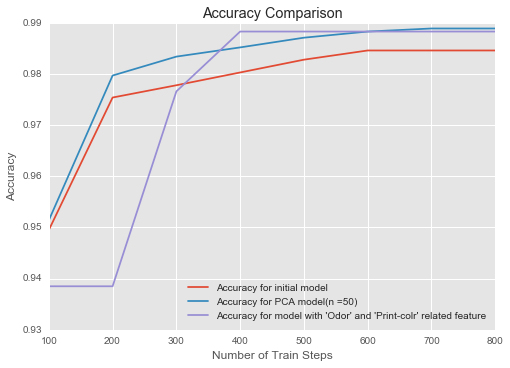

In [43]:
# performance comparison between initial model, final model(PCA) 

x = range(100, 900, 100)
plt.plot(x,acc_base)
plt.plot(x,acc_reduced["50-components"])
plt.plot(x,acc_feature)
plt.title("Accuracy Comparison")
# label = ["Accuracy for model with significant features"] 
plt.ylabel('Accuracy')
plt.xlabel('Number of Train Steps')

label = ["Accuracy for initial model", \
         "Accuracy for PCA model(n =50)",\
         "Accuracy for model with 'Odor' and 'Print-colr' related feature"] 
label_2 = ["a", "b", "c"]
plt.legend(label, loc ='lower right')